In [1]:
import pandas as pd
file_path = "sp500_historical_data_cleaned.csv"
df = pd.read_csv(file_path)
df.head()


,Date,Close,High,Low,Open,Volume
0,2019-01-02,2510.03,2519.49,2467.47,2476.96,3733160000
1,2019-01-03,2447.89,2493.14,2443.96,2491.92,3858830000
2,2019-01-04,2531.94,2538.07,2474.33,2474.33,4234140000
3,2019-01-07,2549.69,2566.16,2524.56,2535.61,4133120000
4,2019-01-08,2574.41,2579.82,2547.56,2568.11,4120060000


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

df['Target'] = (df['Close'].diff() > 0).astype(int)
df = df.iloc[1:].reset_index(drop=True)
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Target']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
accuracy, report


(0.6384364820846905,
 '              precision    recall  f1-score   support\n\n           0       0.80      0.27      0.40       139\n           1       0.61      0.95      0.74       168\n\n    accuracy                           0.64       307\n   macro avg       0.71      0.61      0.57       307\nweighted avg       0.70      0.64      0.59       307\n')

In [4]:
df

,Date,Close,High,Low,Open,Volume,Target
0,2019-01-03,2447.89,2493.14,2443.96,2491.92,3858830000,0
1,2019-01-04,2531.94,2538.07,2474.33,2474.33,4234140000,1
2,2019-01-07,2549.69,2566.16,2524.56,2535.61,4133120000,1
3,2019-01-08,2574.41,2579.82,2547.56,2568.11,4120060000,1
4,2019-01-09,2584.96,2595.32,2568.89,2580.00,4088740000,1
...,...,...,...,...,...,...,...
1529,2025-02-03,5994.57,6022.13,5923.93,5969.65,4797210000,0
1530,2025-02-04,6037.88,6042.48,5990.87,5998.14,4410160000,1
1531,2025-02-05,6061.48,6062.86,6007.06,6020.45,4756250000,1
1532,2025-02-06,6083.57,6084.03,6046.83,6072.22,4847120000,1


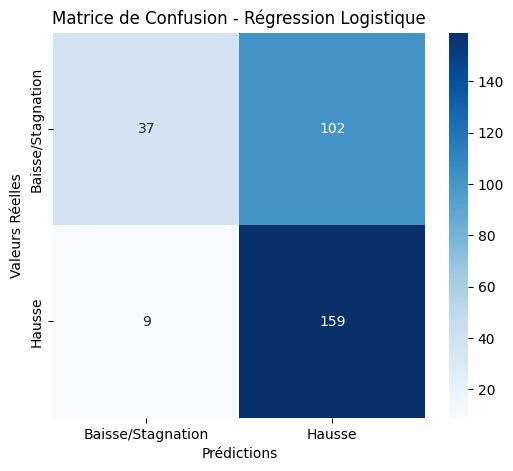

In [3]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Baisse/Stagnation", "Hausse"], yticklabels=["Baisse/Stagnation", "Hausse"])
plt.xlabel("Prédictions")
plt.ylabel("Valeurs Réelles")
plt.title("Matrice de Confusion - Régression Logistique")
plt.show()


In [21]:
df['Return'] = df['Close'].pct_change() * 100
df['Open_Close_Change'] = ((df['Close'] - df['Open']) / df['Open']) * 100
df['SMA_5'] = df['Close'].rolling(window=5).mean()
df = df.dropna().reset_index(drop=True)

X_new = df[['Open', 'High', 'Low', 'Volume', 'Return', 'Open_Close_Change', 'SMA_5']]
y_new = df['Target']

X_new_scaled = scaler.fit_transform(X_new)
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new_scaled, y_new, test_size=0.2, random_state=42, stratify=y_new)

model_new = LogisticRegression()
model_new.fit(X_train_new, y_train_new)
y_pred_new = model_new.predict(X_test_new)
accuracy_new = accuracy_score(y_test_new, y_pred_new)
report_new = classification_report(y_test_new, y_pred_new)
accuracy_new, report_new


(0.972972972972973,
 '              precision    recall  f1-score   support\n\n           0       0.96      0.99      0.97       134\n           1       0.99      0.96      0.97       162\n\n    accuracy                           0.97       296\n   macro avg       0.97      0.97      0.97       296\nweighted avg       0.97      0.97      0.97       296\n')

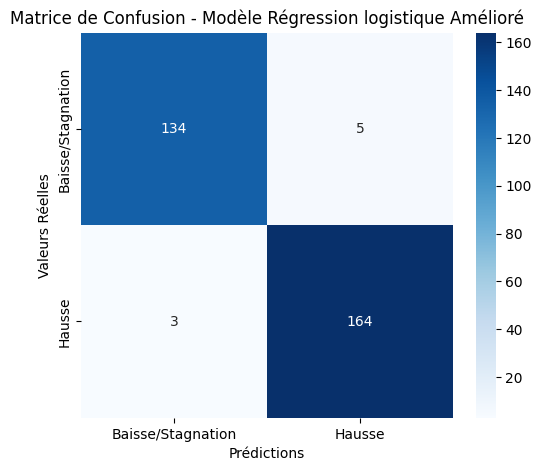

In [ ]:
conf_matrix_new = confusion_matrix(y_test_new, y_pred_new)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_new, annot=True, fmt="d", cmap="Blues", xticklabels=["Baisse/Stagnation", "Hausse"], yticklabels=["Baisse/Stagnation", "Hausse"])
plt.xlabel("Prédictions")
plt.ylabel("Valeurs Réelles")
plt.title("Matrice de Confusion - Modèle Régression Logistique Amélioré")
plt.show()


In [22]:
df['Date'] = pd.to_datetime(df['Date'])

train_df = df[df['Date'] < '2024-01-01']
test_df = df[df['Date'] >= '2024-01-01']
X_train_time = train_df[['Open', 'High', 'Low', 'Volume', 'Return', 'Open_Close_Change', 'SMA_5']]
y_train_time = train_df['Target']
X_test_time = test_df[['Open', 'High', 'Low', 'Volume', 'Return', 'Open_Close_Change', 'SMA_5']]
y_test_time = test_df['Target']

X_train_time_scaled = scaler.fit_transform(X_train_time)
X_test_time_scaled = scaler.transform(X_test_time)

model_time = LogisticRegression()
model_time.fit(X_train_time_scaled, y_train_time)

y_pred_time = model_time.predict(X_test_time_scaled)
accuracy_time = accuracy_score(y_test_time, y_pred_time)
report_time = classification_report(y_test_time, y_pred_time)

accuracy_time, report_time


(0.9675090252707581,
 '              precision    recall  f1-score   support\n\n           0       0.94      0.99      0.96       119\n           1       0.99      0.95      0.97       158\n\n    accuracy                           0.97       277\n   macro avg       0.96      0.97      0.97       277\nweighted avg       0.97      0.97      0.97       277\n')

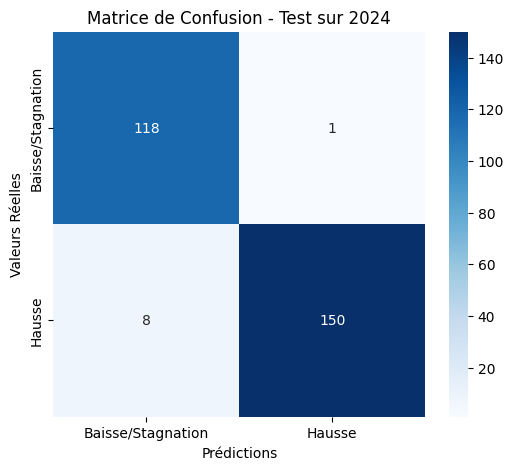

In [23]:
conf_matrix_time = confusion_matrix(y_test_time, y_pred_time)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_time, annot=True, fmt="d", cmap="Blues", xticklabels=["Baisse/Stagnation", "Hausse"], yticklabels=["Baisse/Stagnation", "Hausse"])
plt.xlabel("Prédictions")
plt.ylabel("Valeurs Réelles")
plt.title("Matrice de Confusion - Test sur 2024")
plt.show()


In [26]:
window_rsi = 14
delta = df['Close'].diff(1)
gain = (delta.where(delta > 0, 0)).rolling(window=window_rsi).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=window_rsi).mean()
rs = gain / loss
df['RSI_14'] = 100 - (100 / (1 + rs))

short_window = 12
long_window = 26
signal_window = 9
df['EMA_12'] = df['Close'].ewm(span=short_window, adjust=False).mean()
df['EMA_26'] = df['Close'].ewm(span=long_window, adjust=False).mean()
df['MACD'] = df['EMA_12'] - df['EMA_26']
df['MACD_Signal'] = df['MACD'].ewm(span=signal_window, adjust=False).mean()
df['MACD_Hist'] = df['MACD'] - df['MACD_Signal']
window_bb = 20
df['Middle_BB'] = df['Close'].rolling(window=window_bb).mean()
df['Std_BB'] = df['Close'].rolling(window=window_bb).std()
df['Upper_BB'] = df['Middle_BB'] + (df['Std_BB'] * 2)
df['Lower_BB'] = df['Middle_BB'] - (df['Std_BB'] * 2)
df = df.dropna().reset_index(drop=True)

train_df = df[df['Date'] < '2024-01-01']
test_df = df[df['Date'] >= '2024-01-01']

X_train_tech = train_df[['Open', 'High', 'Low', 'Volume', 'Return', 'Open_Close_Change', 'SMA_5', 'RSI_14', 'MACD', 'MACD_Signal', 'MACD_Hist', 'Upper_BB', 'Middle_BB', 'Lower_BB']]
y_train_tech = train_df['Target']
X_test_tech = test_df[['Open', 'High', 'Low', 'Volume', 'Return', 'Open_Close_Change', 'SMA_5', 'RSI_14', 'MACD', 'MACD_Signal', 'MACD_Hist', 'Upper_BB', 'Middle_BB', 'Lower_BB']]
y_test_tech = test_df['Target']

X_train_tech_scaled = scaler.fit_transform(X_train_tech)
X_test_tech_scaled = scaler.transform(X_test_tech)

model_tech = LogisticRegression()
model_tech.fit(X_train_tech_scaled, y_train_tech)

y_pred_tech = model_tech.predict(X_test_tech_scaled)
accuracy_tech = accuracy_score(y_test_tech, y_pred_tech)
report_tech = classification_report(y_test_tech, y_pred_tech)

accuracy_tech, report_tech


(0.9711191335740073,
 '              precision    recall  f1-score   support\n\n           0       0.96      0.97      0.97       119\n           1       0.98      0.97      0.97       158\n\n    accuracy                           0.97       277\n   macro avg       0.97      0.97      0.97       277\nweighted avg       0.97      0.97      0.97       277\n')

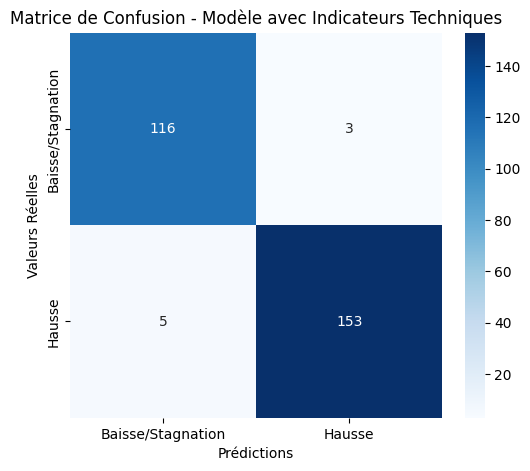

In [27]:
conf_matrix_tech = confusion_matrix(y_test_tech, y_pred_tech)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_tech, annot=True, fmt="d", cmap="Blues", xticklabels=["Baisse/Stagnation", "Hausse"], yticklabels=["Baisse/Stagnation", "Hausse"])
plt.xlabel("Prédictions")
plt.ylabel("Valeurs Réelles")
plt.title("Matrice de Confusion - Modèle avec Indicateurs Techniques")
plt.show()
